This notebook visualises the total number of night rider trips from the city

It is based on the data provided by Transport for NSW
- Night rider data is cleaned in this [notebook](1_OD_Cleaning.ipynb)
- map boundary data is sourced from the [open government portal](https://data.gov.au/dataset?tags=Boundaries)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

import geopandas as gp
from shapely.geometry import box

In [2]:
df = pd.read_pickle('ODPairData/df_clean.pkl')

In the following analysis, we will only include trips from these stations

In [3]:
include = ['Central Station', 'Town Hall Station', 'Town Hall House', 
           'Circular Quay', 'Martin Place Station', 
           'Newtown Station',  'Kings Cross Station']

# Visualisation by Local Government Area

Prepare the LGA mapping data

In [4]:
gdf_LGA = gp.read_file('geodata/NSW_LGA.shp')[['nsw_lga__3', 'geometry']]
gdf_LGA = gdf_LGA.rename(columns={'nsw_lga__3':'LGA'}).query('LGA != "UNINCORPORATED"')

Then total all night rider data and create a geodataframe for plotting

In [5]:
df_totals=df.query('From in @include').groupby(['LGA']).Totaltrips.agg(sum).to_frame().reset_index().dropna()
df_totals.LGA = df_totals.LGA.apply(str.upper)
df_map = gp.GeoDataFrame(df_totals.merge(gdf_LGA, on='LGA'), crs=gdf_LGA.crs)

In this map the trips are broken into 7 bins of equal range

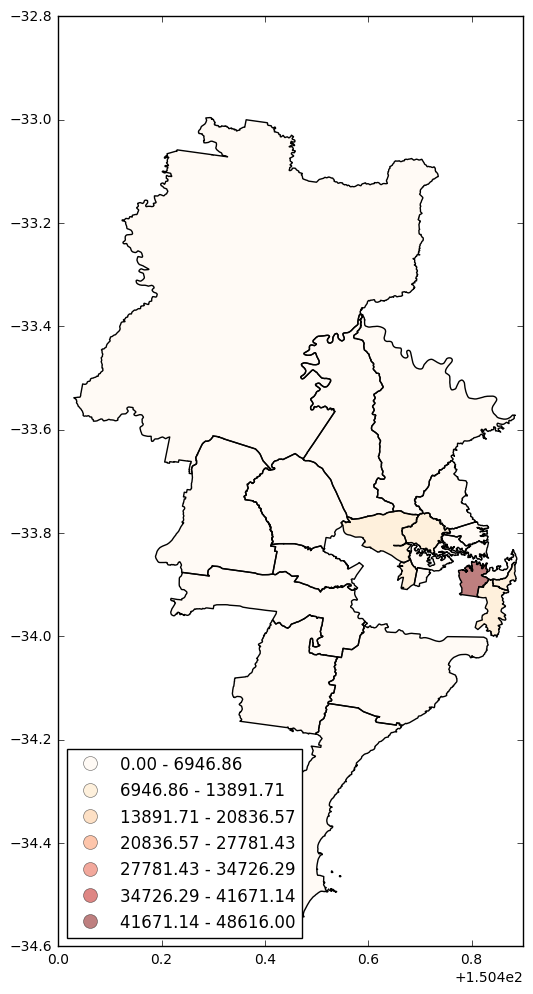

In [6]:
df_map.query("LGA not in ['NEWCASTLE', 'BOGAN']").plot(column='Totaltrips', scheme='Equal_Interval', k=7, cmap='OrRd', legend=True, label='LGA');

To create more contrast the bins are broken into 5 quantiles

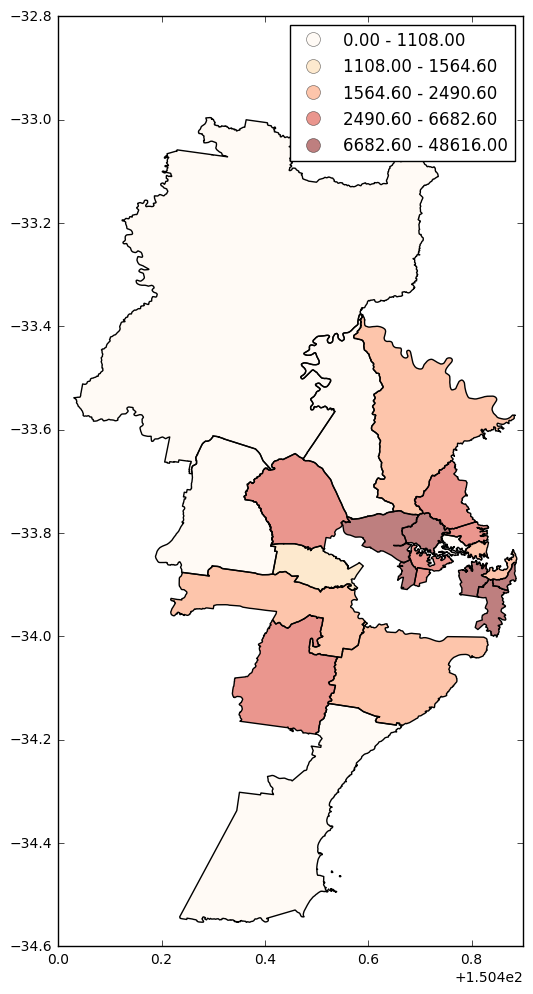

In [7]:
df_map.query("LGA not in ['NEWCASTLE', 'BOGAN']").plot(column='Totaltrips', scheme='QUANTILES', k=5, cmap='OrRd', legend=True, label='LGA');

In [8]:
df_totals.sort_values(by='Totaltrips', ascending=False).head(20)

,LGA,Totaltrips
34,SYDNEY,48616.0
30,ROCKDALE,12795.0
22,MARRICKVILLE,12359.0
29,RANDWICK,11374.0
9,CANTERBURY,11021.0
26,PARRAMATTA,9645.0
10,CITY OF KOGARAH,9230.0
31,RYDE,8335.0
32,STRATHFIELD,8088.0
37,WAVERLEY,7690.0


## Suburb 

In [9]:
gdf_Suburb = gp.read_file('geodata/NSW_Suburb.shp')[['nsw_loca_2', 'geometry']]

In [10]:
gdf_Suburb = gdf_Suburb.rename(columns={'nsw_loca_2':'Suburb'})

In [11]:
df_totals=df.query('From in @include').groupby(['Suburb']).Totaltrips.agg(sum).to_frame().reset_index().dropna()
df_totals.Suburb = df_totals.Suburb.apply(str.upper)

df_map = gp.GeoDataFrame(df_totals.merge(gdf_Suburb, on='Suburb'), crs=gdf_Suburb.crs)

In this map the trips are broken into 7 bins of equal range

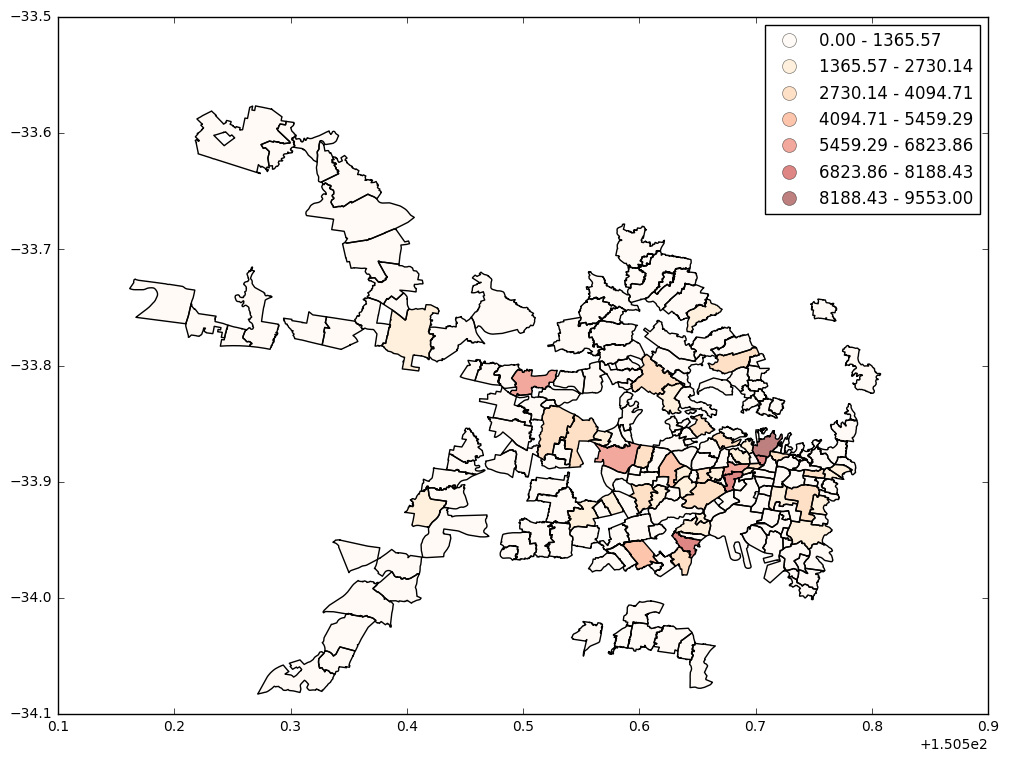

In [12]:
df_map[df_map.within(box(150, -34.5, 152, -33))].plot(column='Totaltrips', scheme='Equal_Interval', k=7, cmap='OrRd', legend=True)

To create more contrast the bins are broken into 5 quantiles

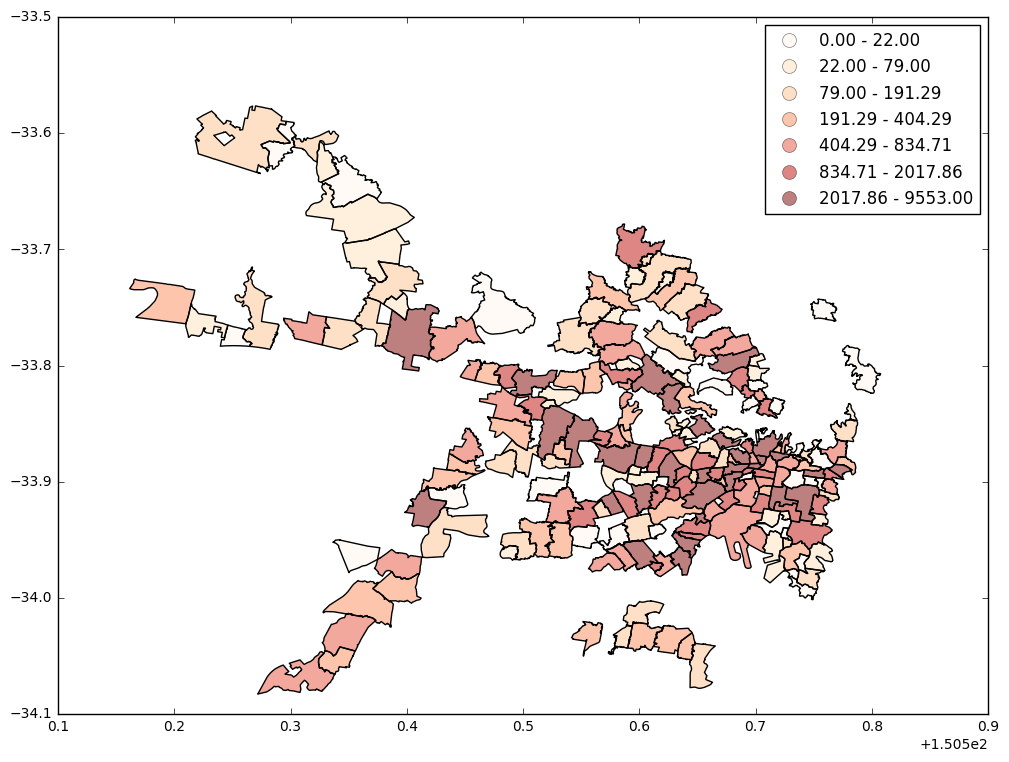

In [13]:
df_map[df_map.within(box(150, -34.5, 152, -33))].plot(column='Totaltrips', scheme='QUANTILES', k=7, cmap='OrRd', legend=True)

In [14]:
df_totals.sort_values(by='Totaltrips', ascending=False).head(20)

,Suburb,Totaltrips
249,SYDNEY,9553.0
121,HAYMARKET,7835.0
221,ROCKDALE,7725.0
181,NEWTOWN,7230.0
244,STRATHFIELD,6340.0
40,CAMPERDOWN,6225.0
196,PARRAMATTA,5556.0
8,ASHFIELD,4835.0
130,HURSTVILLE,4164.0
9,AUBURN,4049.0
